In [ ]:
import pandas as pd
import numpy as np
df_train=pd.read_csv(r"C:\Users\ISTM\OneDrive - Ramboll\Desktop\ISHANT\train.csv")
df_test=pd.read_csv(r"C:\Users\ISTM\OneDrive - Ramboll\Desktop\ISHANT\test.csv")

In [996]:
df_train.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [998]:
df_test.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price
0,6480,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10
1,6481,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85
2,6482,31-01-18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83
3,6483,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54
4,6484,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83


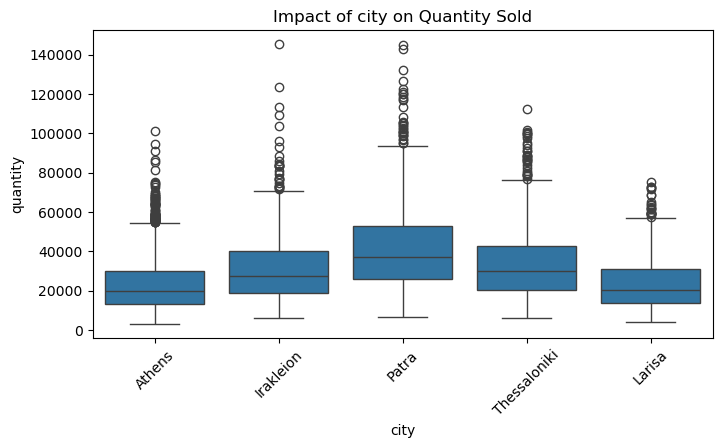

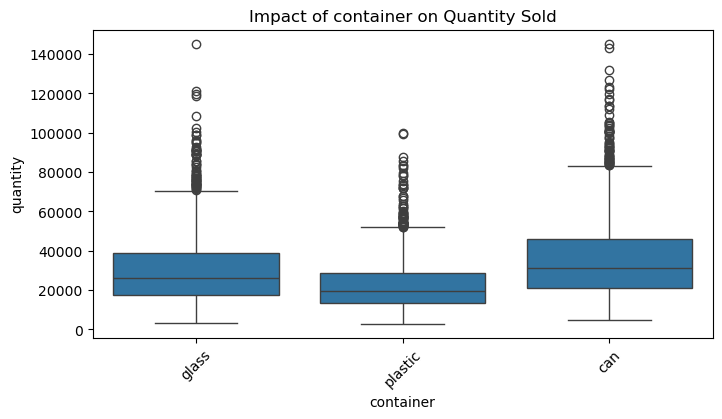

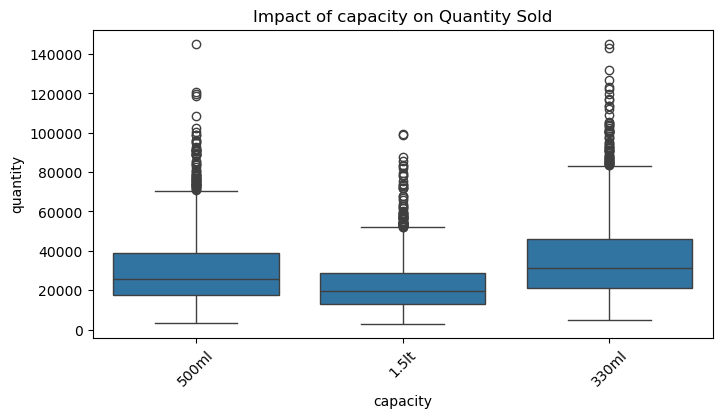

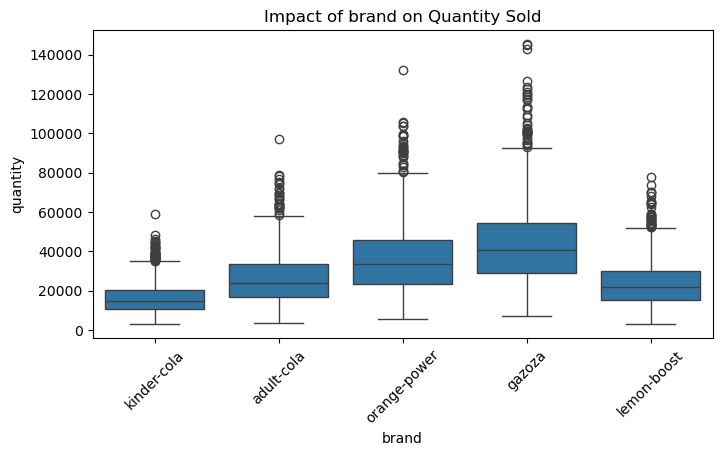

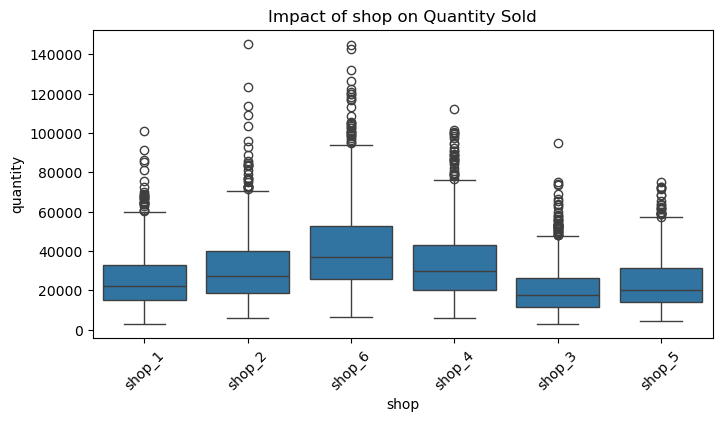

In [1050]:
categorical_features = ['city', 'container', 'capacity', 'brand','shop']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_train[feature], y=df_train['quantity'])
    plt.title(f'Impact of {feature} on Quantity Sold')
    plt.xticks(rotation=45)
    plt.show()

# There are a lot of outliers, and the high variance might be due to the interrelationships among features. However, one thing to note in the box plot is that the median is varying significantly for city, capacity, and brand, which might be important features for prediction. There's a lot of interrelationship among the features, so I'm starting with XGBoost to avoid overfitting

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [ ]:
df_train.isnull().sum()

id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64

In [ ]:
df_test.isnull().sum()

id            0
date          0
city          0
lat           8
long         13
pop           0
shop          0
brand         0
container     3
capacity      4
price         0
dtype: int64

# Let's remove the null rows. I am not popluating the missing data as XGboost can handle it automatically. 

In [1007]:
df_train=df_train.dropna()
df_test=df_test.dropna()

In [1009]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6376 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6376 non-null   float64
 1   date       6376 non-null   object 
 2   city       6376 non-null   object 
 3   lat        6376 non-null   float64
 4   long       6376 non-null   float64
 5   pop        6376 non-null   float64
 6   shop       6376 non-null   object 
 7   brand      6376 non-null   object 
 8   container  6376 non-null   object 
 9   capacity   6376 non-null   object 
 10  price      6376 non-null   float64
 11  quantity   6376 non-null   float64
dtypes: float64(6), object(6)
memory usage: 647.6+ KB


In [1011]:
df_train['city'].sort_values().unique()

array(['Athens', 'Irakleion', 'Larisa', 'Patra', 'Thessaloniki'],
      dtype=object)

# We have five cities lets plot them latitude and longitude wise.

Text(0, 0.5, 'long')

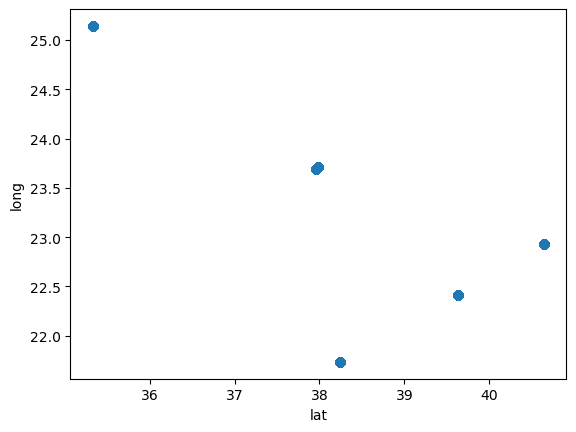

In [1014]:
import matplotlib.pyplot as plt
plt.scatter(df_train['lat'],df_train['long'])
plt.xlabel('lat')
plt.ylabel('long')

# As we can see, we have a total of 5 clusters for Location. We are going to simplify it using K-means

C:\Programdata\Anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Programdata\Anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Programdata\Anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Programdata\Anaconda3\Lib\site-packages\sklearn\base.py:1474: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


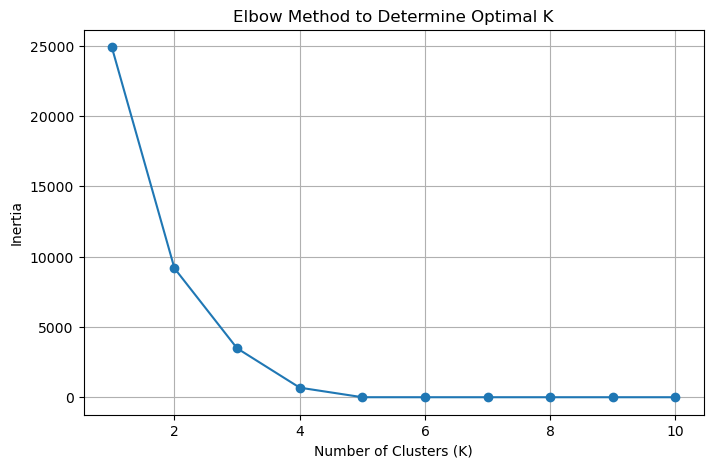

In [1017]:
inertia = []
K_range = range(1, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_train[['lat', 'long']])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal K")
plt.grid()
plt.show()


# We can see that 5 is the optimum number of clusters for latitude and longitude, as inertia no longer decreases after that.

In [1019]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_train['location_cluster'] = kmeans.fit_predict(df_train[['lat', 'long']])

df_test['location_cluster'] = kmeans.predict(df_test[['lat', 'long']])

In [1020]:
df_train.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,location_cluster
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,0


In [1021]:
df_test.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,location_cluster
0,6480,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,0
1,6481,31-01-18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,0
2,6482,31-01-18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,0
3,6483,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,0
4,6484,31-01-18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,0


# Now, let's check the seasonal dependencies of the demand.

In [1023]:
df_train['date']=pd.to_datetime(df_train['date'])
df_train['month']=df_train['date'].dt.month
df_train['year']=df_train['date'].dt.year
df_train['dayofweek']=df_train['date'].dt.dayofweek

C:\Users\ISTM\AppData\Local\Temp\ipykernel_35688\1468969082.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['date']=pd.to_datetime(df_train['date'])


In [1024]:
df_test['date']=pd.to_datetime(df_test['date'])
df_test['month']=df_test['date'].dt.month
df_test['year']=df_test['date'].dt.year
df_test['dayofweek']=df_test['date'].dt.dayofweek

C:\Users\ISTM\AppData\Local\Temp\ipykernel_35688\1856236212.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['date']=pd.to_datetime(df_test['date'])


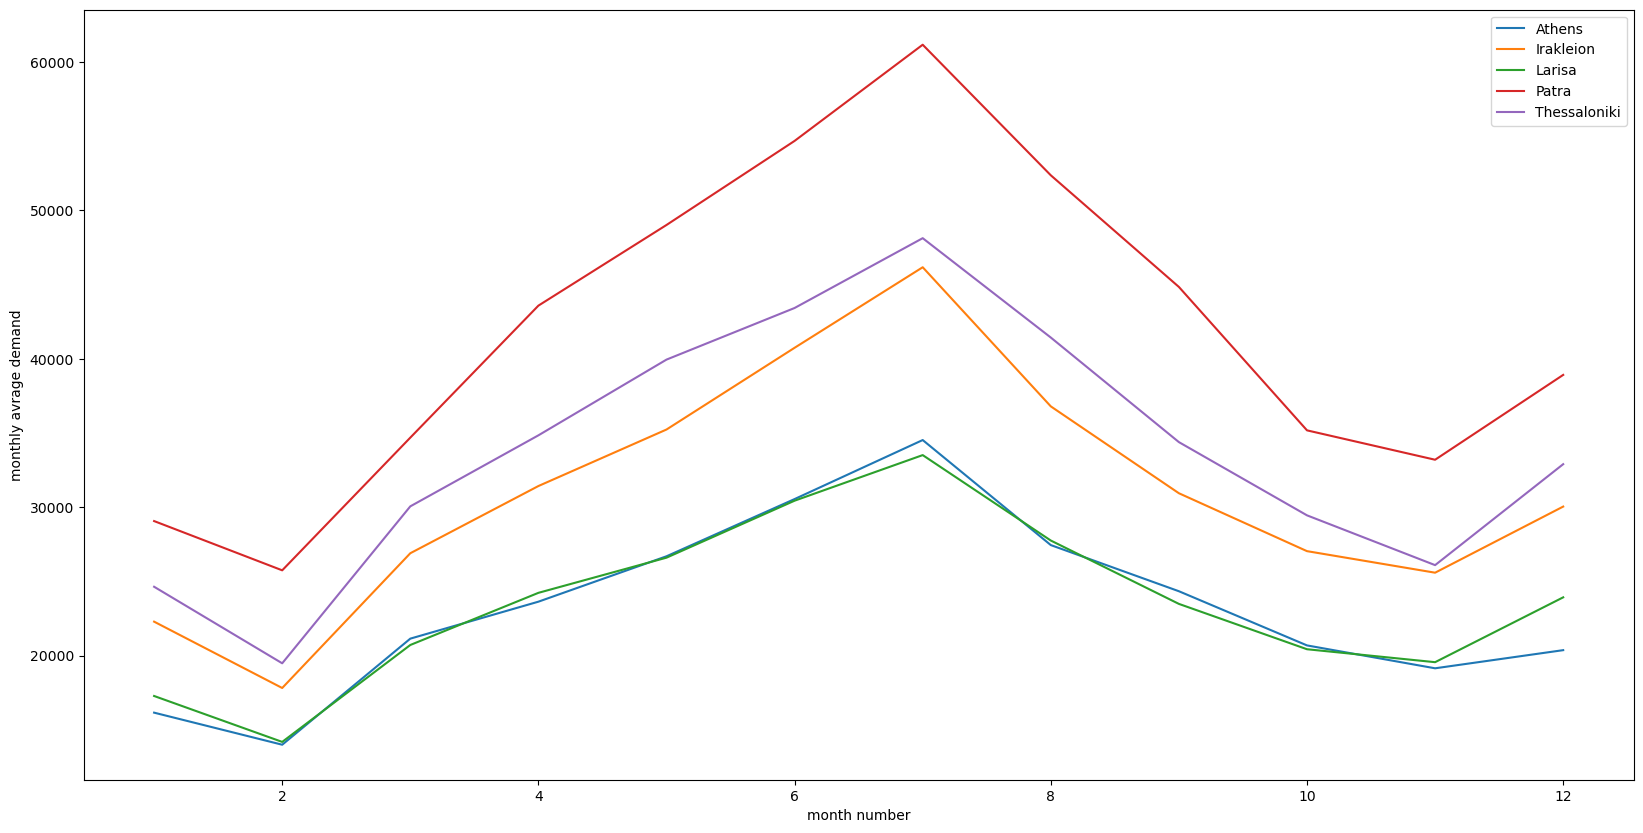

In [1025]:
plt.figure(figsize=(20,10))
arr=['Athens', 'Irakleion', 'Larisa', 'Patra', 'Thessaloniki']
for i in arr:
    
    df_city=df_train['city']==i
    city=df_train[df_city]
    total_quanity=city.groupby('month')['quantity'].mean()
    plt.plot(total_quanity,label=i)
    plt.legend()
    plt.xlabel('month number')
    plt.ylabel('monthly average demand')
    

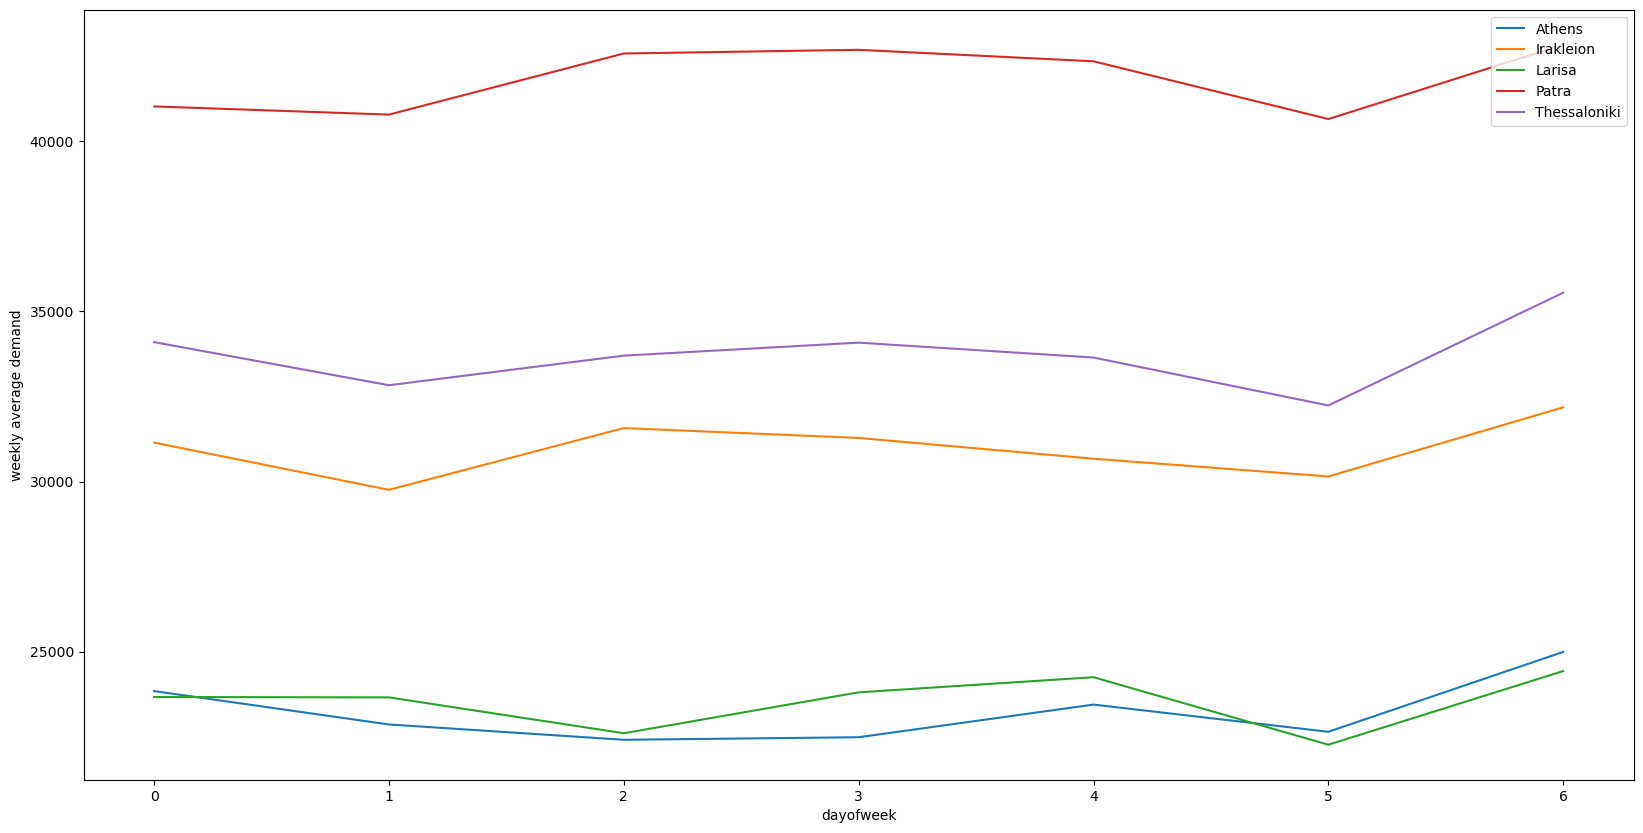

In [1026]:
plt.figure(figsize=(20,10))
arr=['Athens', 'Irakleion', 'Larisa', 'Patra', 'Thessaloniki']
for i in arr:
    
    df_city=df_train['city']==i
    city=df_train[df_city]
    total_quanity=city.groupby('dayofweek')['quantity'].mean()
    plt.plot(total_quanity,label=i)
    plt.legend()
    plt.xlabel('dayofweek')
    plt.ylabel('weekly average demand')

# As we can see, between the 6th and 8th month, we have a peak in monthly demand, and on the last day of the week, Sunday, there is slightly higher demand. Therefore, we might need to convert the month and day of the week into cyclic features to capture seasonality so that XG boost can undertsand that 

In [1029]:
df_train['month_sin'] = np.sin(2 * np.pi * df_train['month']/12)
df_train['month_cos'] = np.cos(2 * np.pi * df_train['month']/12)
df_train['weekday_sin'] = np.sin(2 * np.pi * df_train['dayofweek']/7)
df_train['weekday_cos'] = np.cos(2 * np.pi * df_train['dayofweek']/7)

In [1035]:
df_test['month_sin'] = np.sin(2 * np.pi * df_test['month']/12)
df_test['month_cos'] = np.cos(2 * np.pi * df_test['month']/12)
df_test['weekday_sin'] = np.sin(2 * np.pi * df_test['dayofweek']/7)
df_test['weekday_cos'] = np.cos(2 * np.pi * df_test['dayofweek']/7)

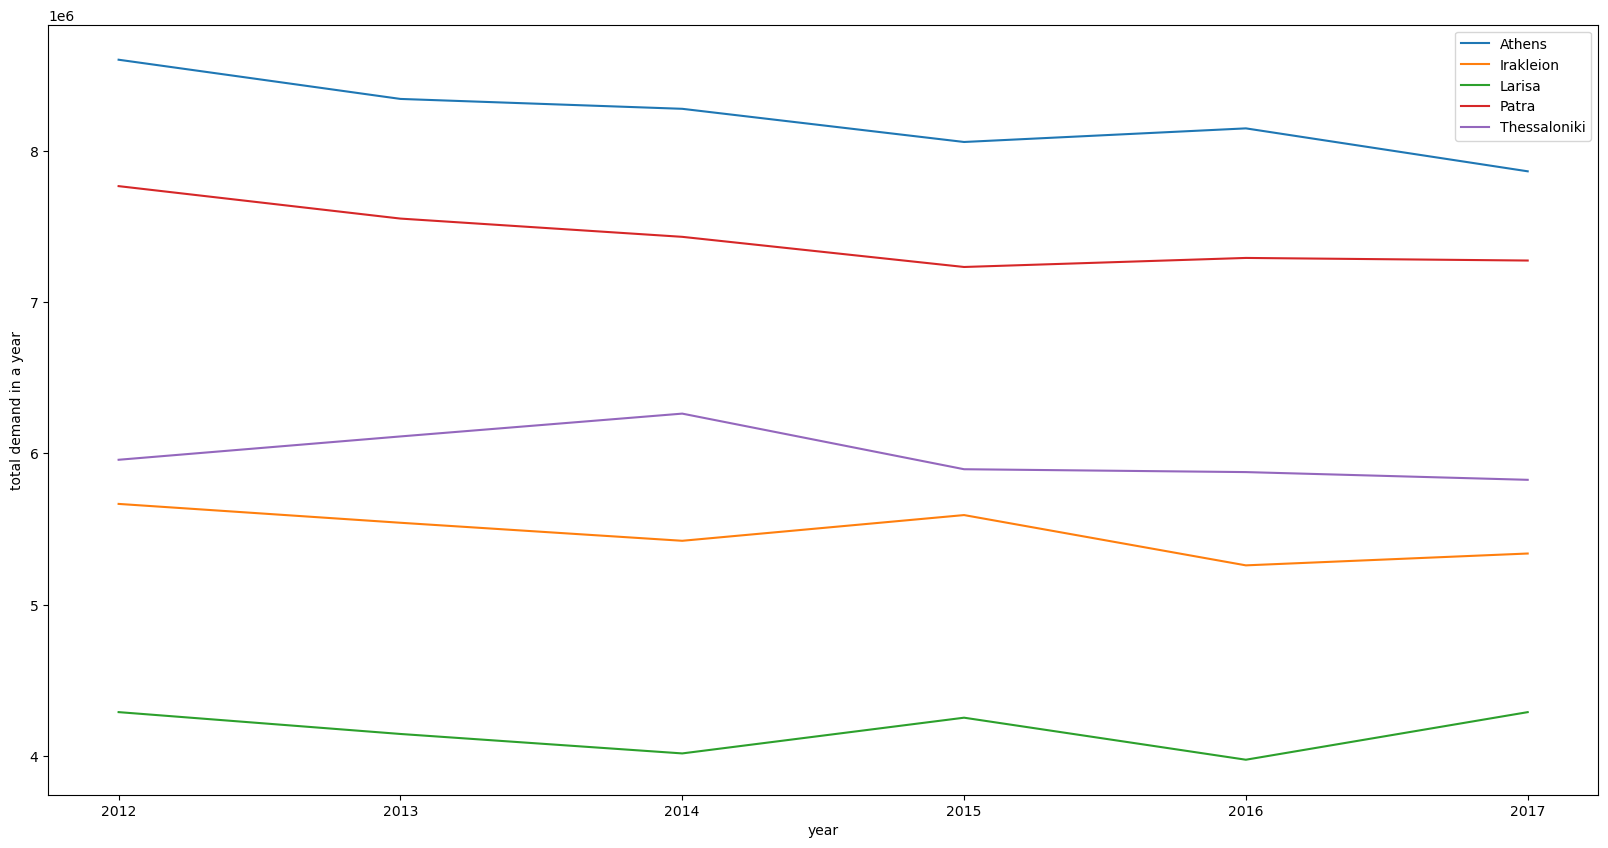

In [1042]:
plt.figure(figsize=(20,10))
arr=['Athens', 'Irakleion', 'Larisa', 'Patra', 'Thessaloniki']
for i in arr:
    
    df_city=df_train['city']==i
    city=df_train[df_city]
    total_quanity=city.groupby('year')['quantity'].sum()
    plt.plot(total_quanity,label=i)
    plt.legend()
    plt.xlabel('year')
    plt.ylabel('total demand in a year')

# As we can see, demand is decreasing marginally each year. Let's check whether this is due to a population decline.

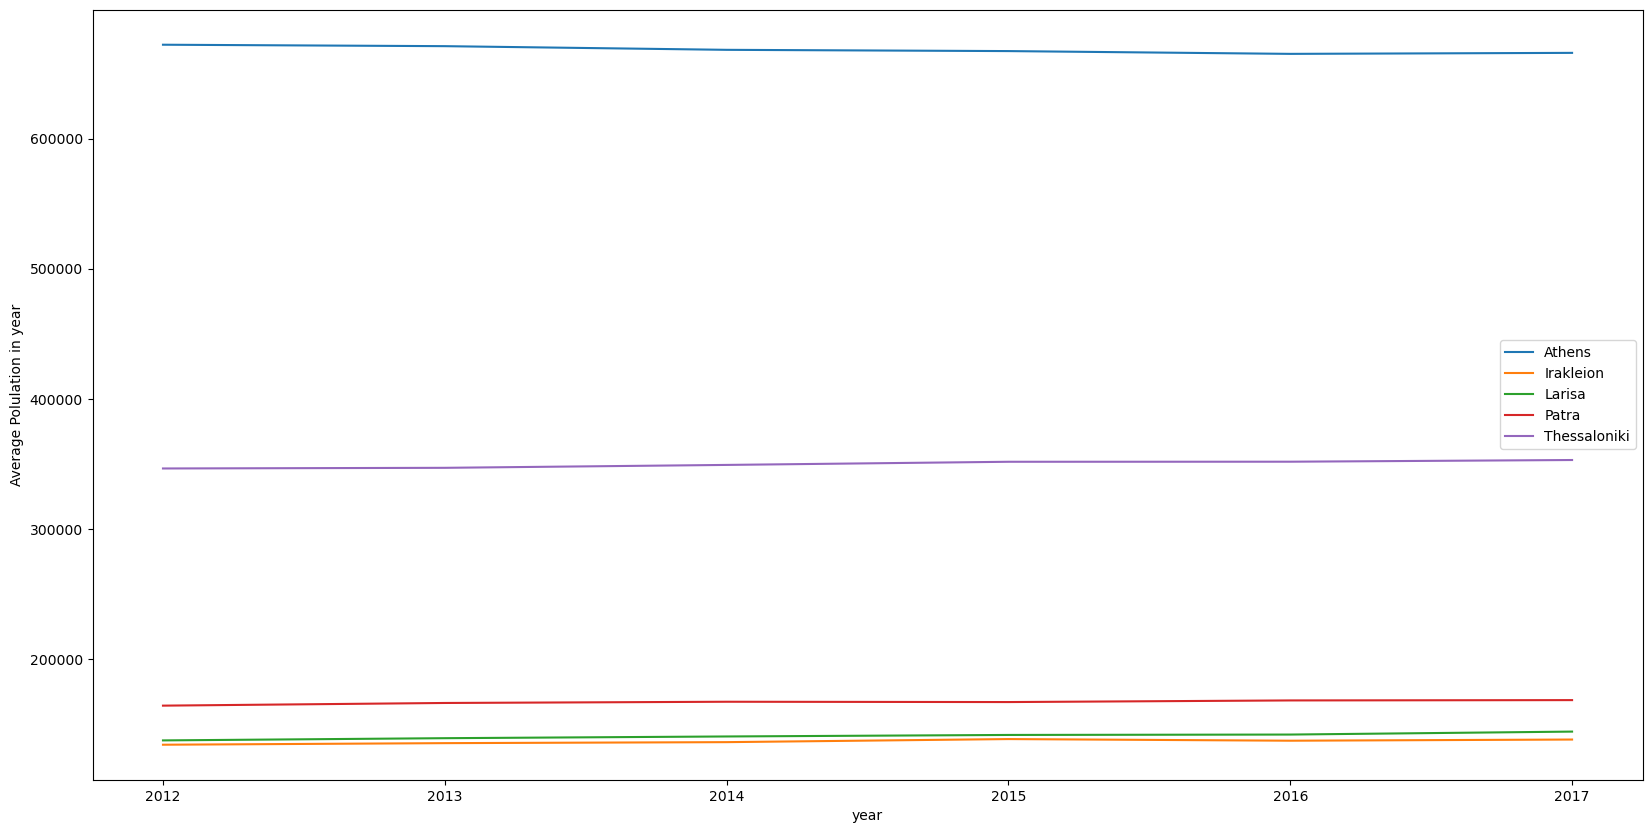

In [833]:
plt.figure(figsize=(20,10))
arr=['Athens', 'Irakleion', 'Larisa', 'Patra', 'Thessaloniki']
for i in arr:
    #plt.figure(figsize=(10,10))
    df_city=df_train['city']==i
    city=df_train[df_city]
    total_quanity=city.groupby('year')['pop'].mean()
    plt.plot(total_quanity,label=i)
    plt.legend()
    plt.xlabel('year')
    plt.ylabel('Average Polulation in year')

# As we can see above, the population has remained almost the same throughout the years. Let's check whether the demand has dropped because of the price. Since we have three different capacities, let's calculate the price per liter to observe the trend.


In [835]:
fil1=df_train['capacity']=='500ml'
df_train.loc[fil1,'capacity in liters']=0.5
fil2=df_train['capacity']=='1.5lt'
df_train.loc[fil2,'capacity in liters']=1.5
fil3=df_train['capacity']=='330ml'
df_train.loc[fil3,'capacity in liters']=0.33
df_train['price per liters']=df_train['price']/df_train['capacity in liters']

In [836]:
fil1=df_test['capacity']=='500ml'
df_test.loc[fil1,'capacity in liters']=0.5
fil2=df_test['capacity']=='1.5lt'
df_test.loc[fil2,'capacity in liters']=1.5
fil3=df_test['capacity']=='330ml'
df_test.loc[fil3,'capacity in liters']=0.33
df_test['price per liters']=df_test['price']/df_test['capacity in liters']

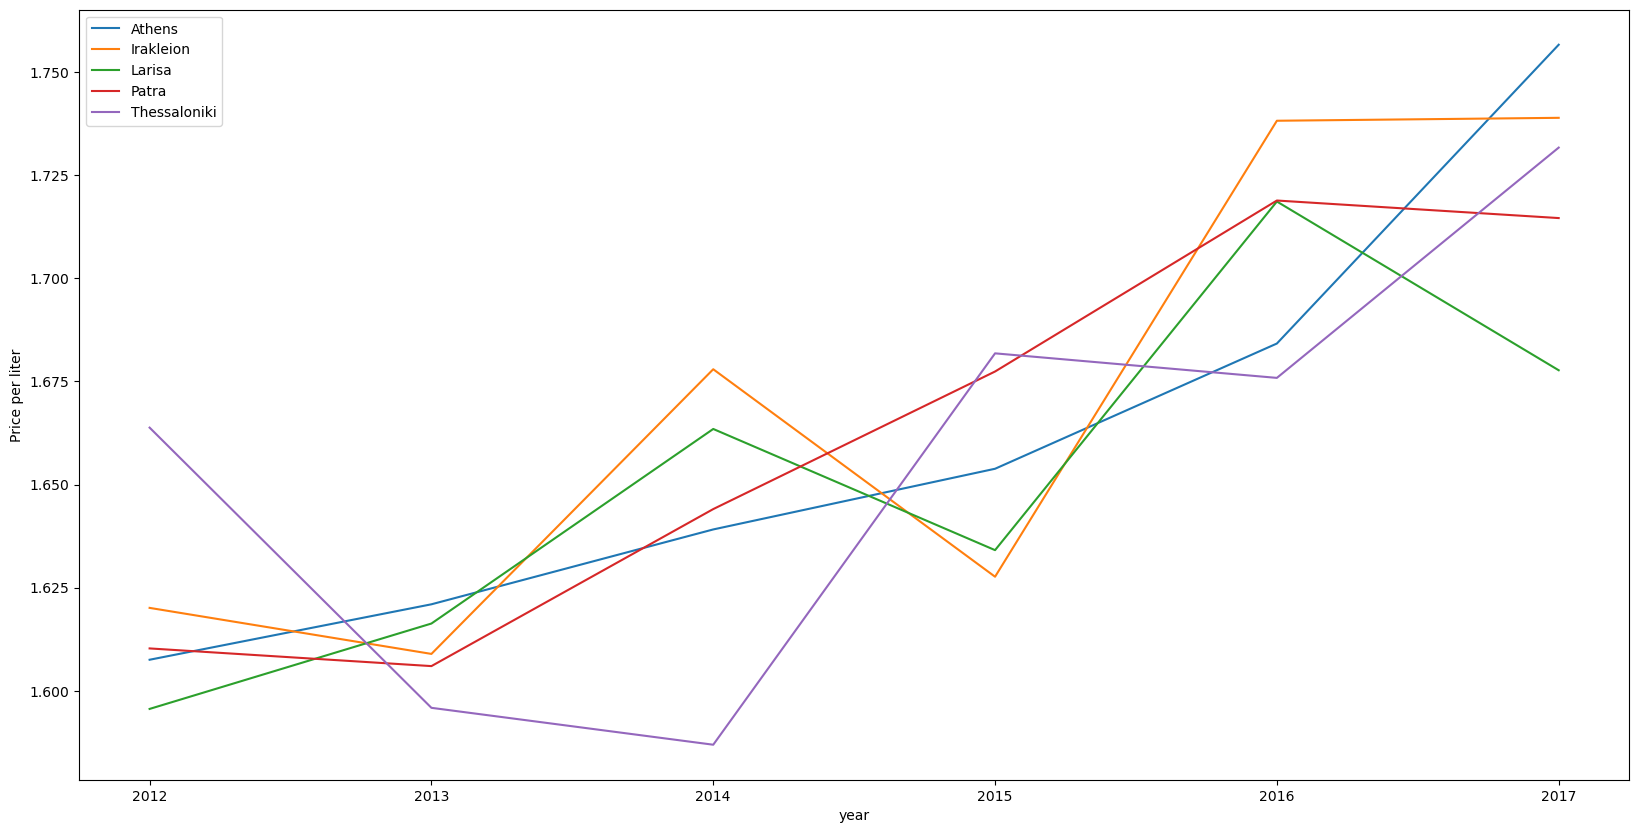

In [837]:
plt.figure(figsize=(20,10))
arr=['Athens', 'Irakleion', 'Larisa', 'Patra', 'Thessaloniki']
for i in arr:
    #plt.figure(figsize=(10,10))
    df_city=df_train['city']==i
    city=df_train[df_city]
    total_quanity=city.groupby('year')['price per liters'].mean()
    plt.plot(total_quanity,label=i)
    plt.legend()
    plt.xlabel('year')
    plt.ylabel('Price per liter')

# As we can see, the price per liter is rising every year while demand is decreasing. This suggests that price per liter might be an important factor in the decline in quantity.

# As we are using XGBoost, we might need to use one-hot encoding to convert categorical data to binary to help the model better understand non-numerical data. Additionally, we may need to drop a few columns that are not useful.

# I am going to drop the ID column (as it is not relevant) and the date column since it has already been accounted for in the year, month, and day format

In [1076]:
df_train1=df_train.drop(columns=['id','date'])
df_test=df_test.drop(columns=['id','date'])

In [841]:
df_train1.head()

,city,lat,long,pop,shop,brand,container,capacity,price,quantity,location_cluster,month,year,dayofweek,month_sin,month_cos,weekday_sin,weekday_cos,capacity in liters,price per liters
0,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,0,1,2012,1,0.5,0.866025,0.781831,0.62349,0.50,1.920000
1,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,0,1,2012,1,0.5,0.866025,0.781831,0.62349,1.50,1.906667
2,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,0,1,2012,1,0.5,0.866025,0.781831,0.62349,0.33,2.636364
3,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,0,1,2012,1,0.5,0.866025,0.781831,0.62349,0.50,2.000000
4,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,0,1,2012,1,0.5,0.866025,0.781831,0.62349,0.33,1.181818


In [843]:
import pandas as pd

df_train2=pd.get_dummies(df_train1,columns=['city','shop','brand','container','capacity'])

Mean Absolute Percentage Error (MAPE): 0.10873761190867634


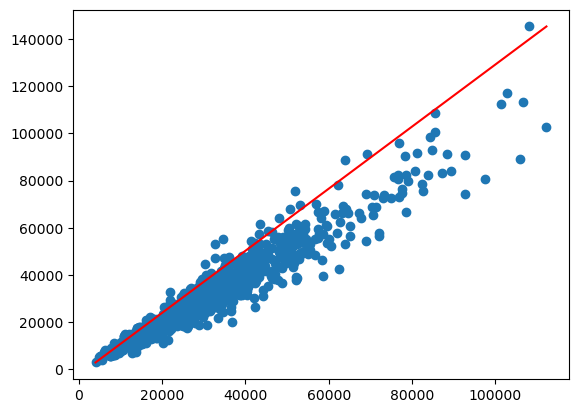

In [844]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

x,y=df_train2.drop(columns=['quantity']),df_train2['quantity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, max_depth=20)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color='red') #ideal prediction is the red line

# The MAPE error is 10.8%, but the fit does not look good overall, as the dots should be distributed on both sides of the red line. Lets check the feature importance.

C:\Users\ISTM\AppData\Local\Temp\ipykernel_35688\896840750.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


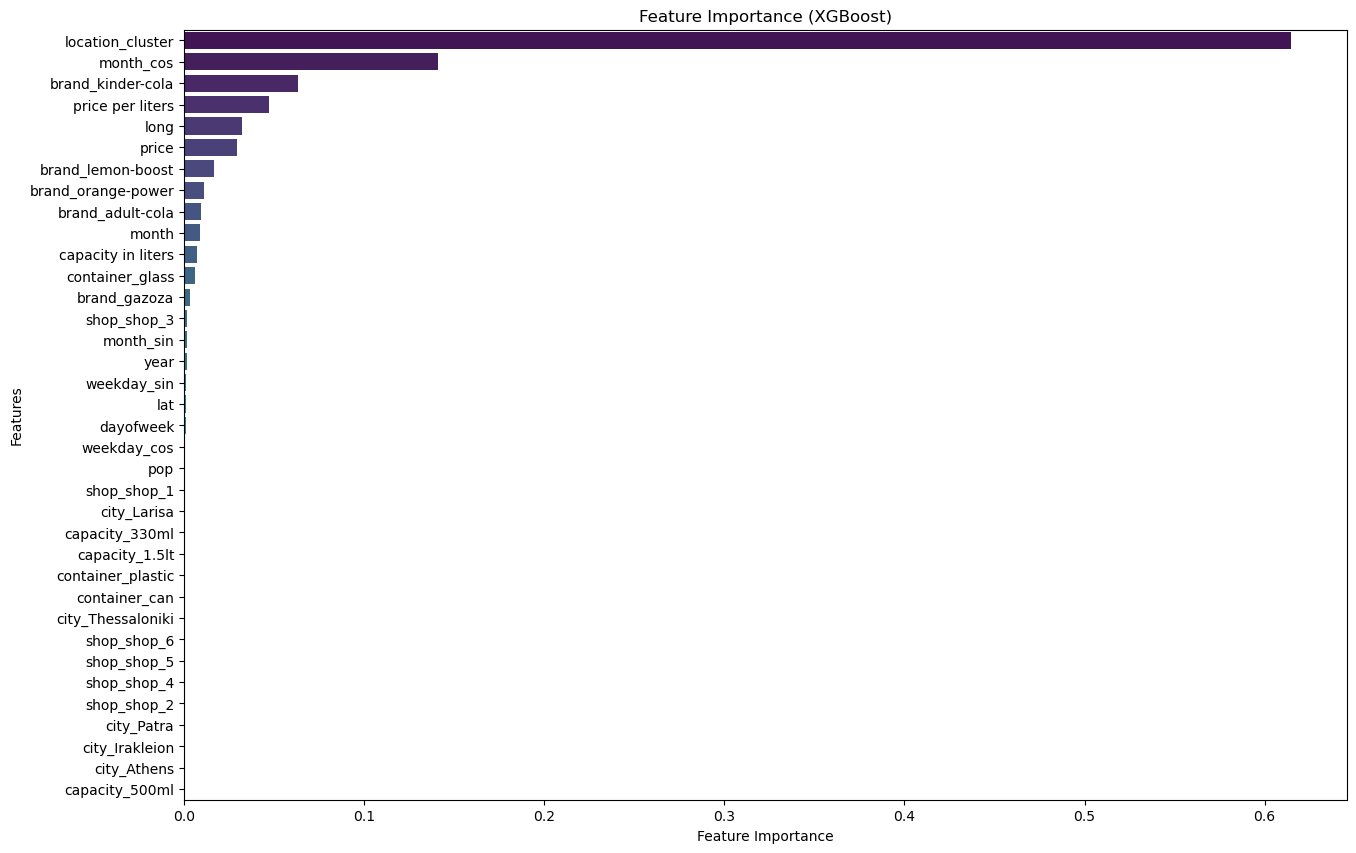

In [845]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = x_test.columns

# Create a DataFrame and sort by importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot sorted feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.show()

# Let's now remove features with low importance, such as City, Shop ID, Container Type, and Capacity, from the training data

In [847]:
df_train1

,city,lat,long,pop,shop,brand,container,capacity,price,quantity,location_cluster,month,year,dayofweek,month_sin,month_cos,weekday_sin,weekday_cos,capacity in liters,price per liters
0,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0,0,1,2012,1,5.000000e-01,0.866025,0.781831,0.62349,0.50,1.920000
1,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0,0,1,2012,1,5.000000e-01,0.866025,0.781831,0.62349,1.50,1.906667
2,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0,0,1,2012,1,5.000000e-01,0.866025,0.781831,0.62349,0.33,2.636364
3,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0,0,1,2012,1,5.000000e-01,0.866025,0.781831,0.62349,0.50,2.000000
4,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0,0,1,2012,1,5.000000e-01,0.866025,0.781831,0.62349,0.33,1.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0,0,12,2017,6,-2.449294e-16,1.000000,-0.781831,0.62349,1.50,0.680000
6476,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0,1,12,2017,6,-2.449294e-16,1.000000,-0.781831,0.62349,0.33,1.424242
6477,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0,3,12,2017,6,-2.449294e-16,1.000000,-0.781831,0.62349,0.50,2.040000
6478,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0,4,12,2017,6,-2.449294e-16,1.000000,-0.781831,0.62349,1.50,0.893333


In [848]:
df_train3=df_train1.drop(columns=['city','shop','container','capacity'])
df_train3=pd.get_dummies(df_train3,columns=['brand'])
df_test=df_test.drop(columns=['city','shop','container','capacity'])
df_test=pd.get_dummies(df_test,columns=['brand'])

Mean Absolute Percentage Error (MAPE): 0.11138588199205182


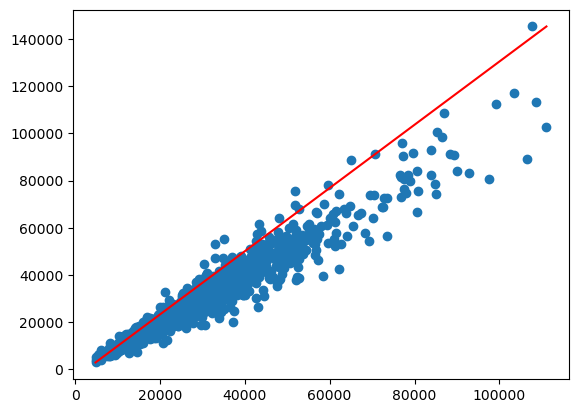

In [849]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

x,y=df_train3.drop(columns=['quantity']),df_train3['quantity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, max_depth=20)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color='red') #ideal prediction is the red line

C:\Users\ISTM\AppData\Local\Temp\ipykernel_35688\896840750.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")


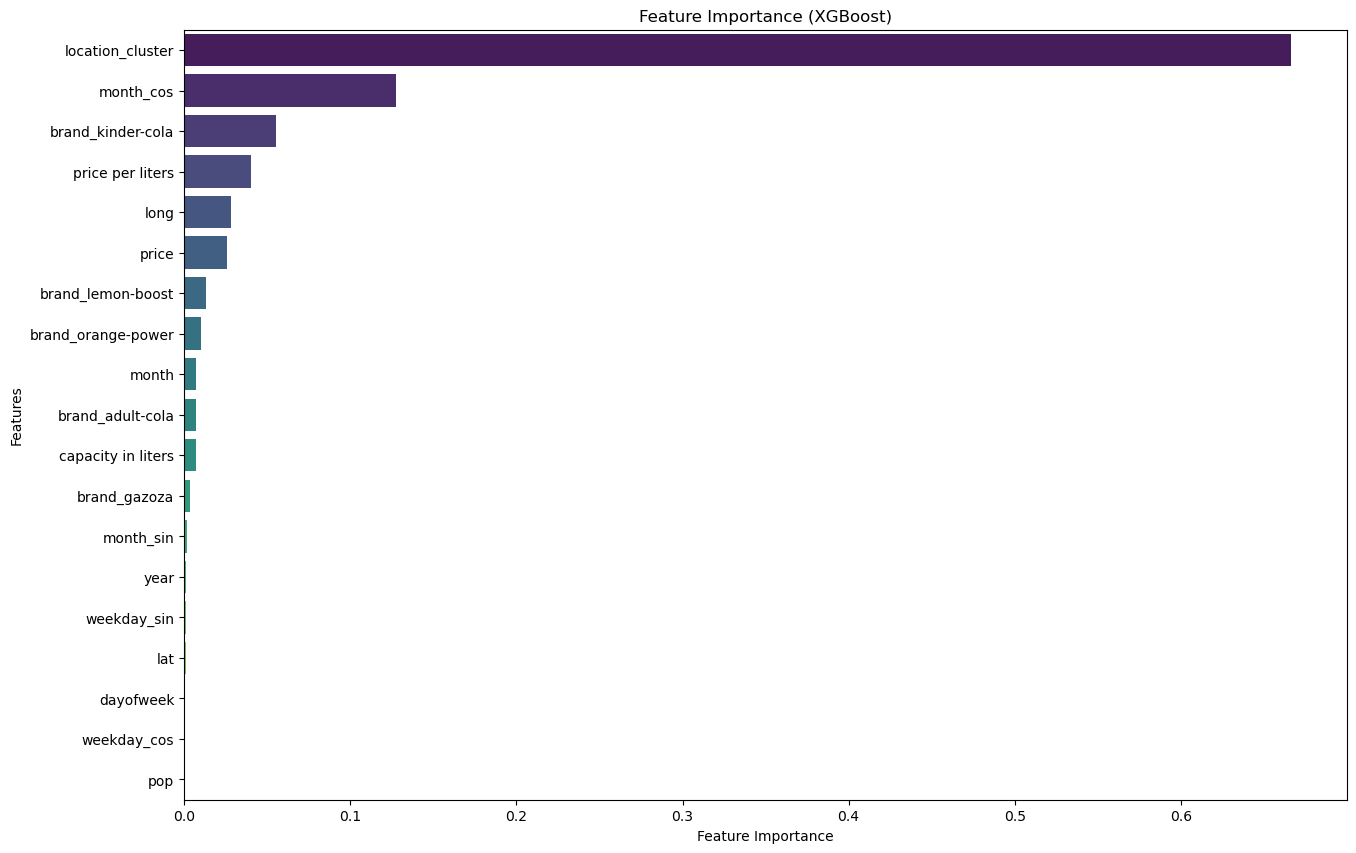

In [850]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = x_test.columns

# Create a DataFrame and sort by importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot sorted feature importances
plt.figure(figsize=(15, 10))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (XGBoost)")
plt.show()

# As the performance has not improved much, let's now examine the distribution to check for any skewness or flat tails in the data

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'location_cluster'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'dayofweek'}>,
        <Axes: title={'center': 'month_sin'}>,
        <Axes: title={'center': 'month_cos'}>,
        <Axes: title={'center': 'weekday_sin'}>],
       [<Axes: title={'center': 'weekday_cos'}>,
        <Axes: title={'center': 'capacity in liters'}>,
        <Axes: title={'center': 'price per liters'}>, <Axes: >]],
      dtype=object)

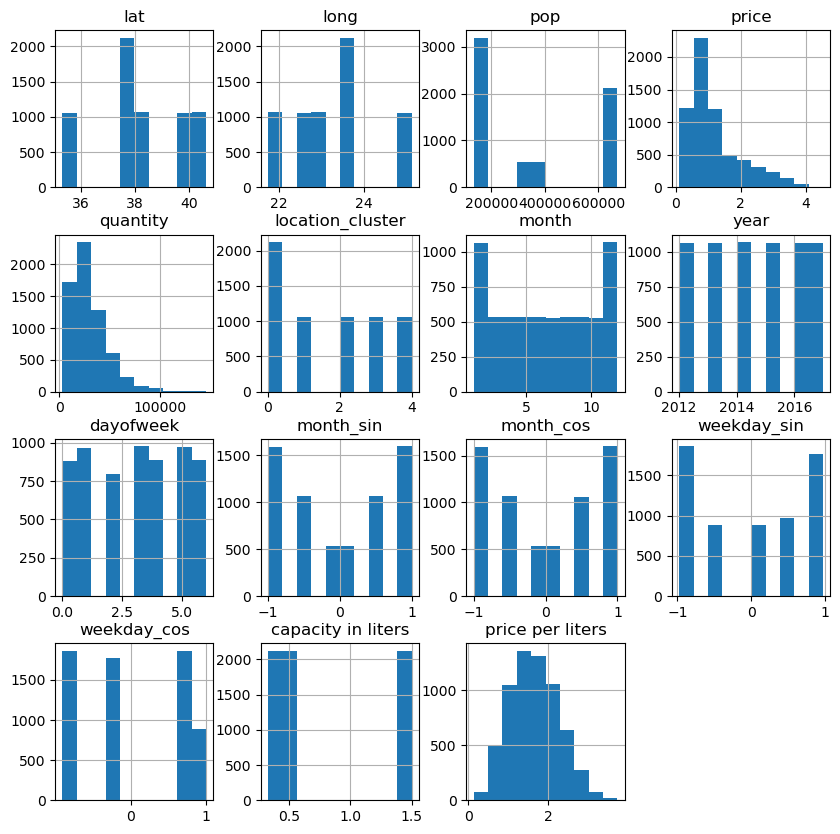

In [852]:
df_train3.hist(figsize=(10,10))


# As we can see a flat tail in the quantity distribution, let's remove it, as it might be preventing our model from training well. Removing everything greater than 95%ile.

In [853]:
df_train4=df_train3[df_train3['quantity']<df_train3['quantity'].quantile(0.95)]
#df_train4=df_train3[df_train3['price']<df_train3['price'].quantile(0.99)]

array([[<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'location_cluster'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'dayofweek'}>,
        <Axes: title={'center': 'month_sin'}>,
        <Axes: title={'center': 'month_cos'}>,
        <Axes: title={'center': 'weekday_sin'}>],
       [<Axes: title={'center': 'weekday_cos'}>,
        <Axes: title={'center': 'capacity in liters'}>,
        <Axes: title={'center': 'price per liters'}>, <Axes: >]],
      dtype=object)

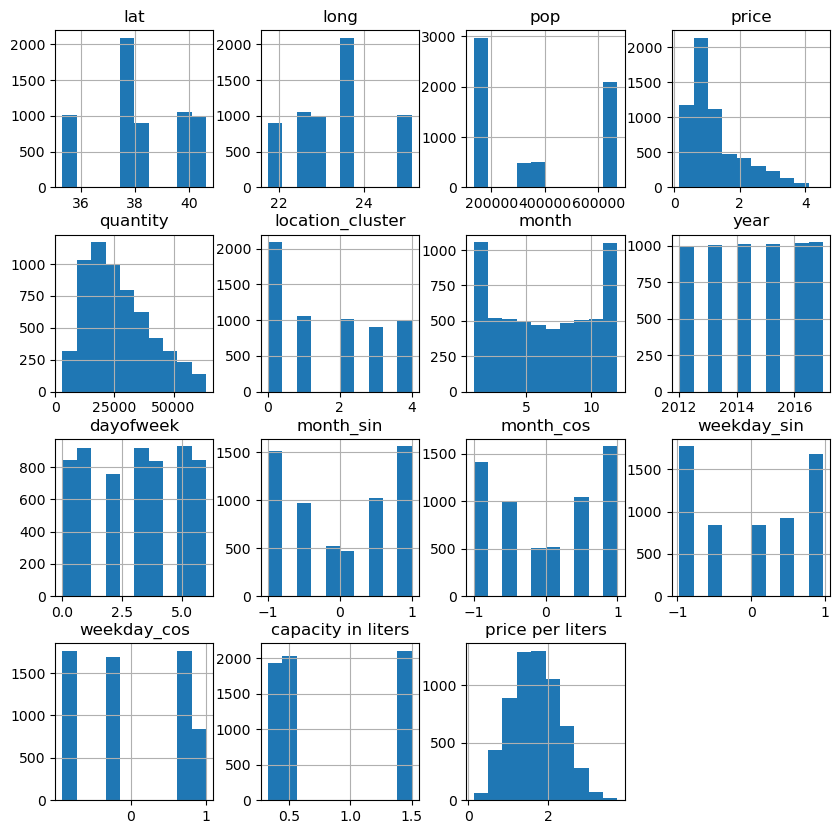

In [1087]:
df_train4.hist(figsize=(10,10))

# Quantity looks much better now lets train and predict again

Mean Absolute Percentage Error (MAPE): 0.1124218443919755


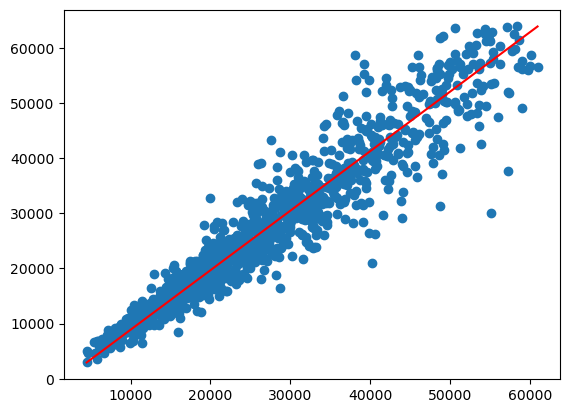

In [854]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

x,y=df_train4.drop(columns=['quantity']),df_train4['quantity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.1, max_depth=20)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", mape)
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color='red') #ideal prediction is the red line

# Plot looks much better now lets tune the hyperparameters using grid search

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Mean Absolute Percentage Error (MAPE): 0.08695550727614806
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


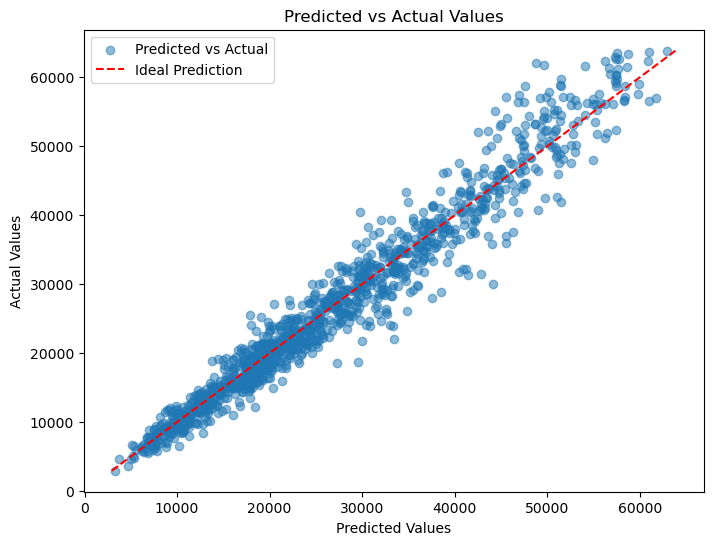

In [856]:
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, make_scorer
from xgboost import XGBRegressor

x,y = df_train4.drop('quantity', axis=1),df_train4['quantity'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(objective='reg:squarederror')

param_grid = {
    'n_estimators': [300,400,500],  # Number of trees
    'learning_rate': [0.1, 0.15, 0.3],  # Learning rate
    'max_depth': [3, 6,9],  # Depth of trees
}

grid_search = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5, n_jobs=-1,verbose=1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred)

print("\nMean Absolute Percentage Error (MAPE):", mape)
print("Best Parameters:", best_params)

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test, alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)],color='red', linestyle="dashed", label="Ideal Prediction")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

In [938]:
df_test.tail()

,lat,long,pop,price,location_cluster,month,year,dayofweek,month_sin,month_cos,weekday_sin,weekday_cos,capacity in liters,price per liters,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
1075,37.97945,23.71622,664046,2.52,0,12,2018,0,-2.449294e-16,1.0,0.0,1.0,1.50,1.680000,False,False,True,False,False
1076,37.97945,23.71622,664046,2.18,0,12,2018,0,-2.449294e-16,1.0,0.0,1.0,1.50,1.453333,False,False,False,False,True
1077,38.24444,21.73444,168034,0.85,3,12,2018,0,-2.449294e-16,1.0,0.0,1.0,0.33,2.575758,False,False,True,False,False
1078,40.64361,22.93086,354290,2.17,4,12,2018,0,-2.449294e-16,1.0,0.0,1.0,1.50,1.446667,True,False,False,False,False
1079,35.32787,25.14341,137154,1.26,2,12,2018,0,-2.449294e-16,1.0,0.0,1.0,0.50,2.520000,True,False,False,False,False


In [914]:
x_test.head()

,lat,long,pop,price,location_cluster,month,year,dayofweek,month_sin,month_cos,weekday_sin,weekday_cos,capacity in liters,price per liters,brand_adult-cola,brand_gazoza,brand_kinder-cola,brand_lemon-boost,brand_orange-power
1125,40.64361,22.93086,347001.0,0.81,4,1,2013,3,0.5,0.866025,0.433884,-0.900969,0.5,1.620000,False,False,False,False,True
6357,37.96245,23.68708,665871.0,1.03,0,11,2017,3,-0.5,0.866025,0.433884,-0.900969,0.5,2.060000,False,False,False,True,False
1149,39.63689,22.41761,139242.0,1.23,1,1,2013,3,0.5,0.866025,0.433884,-0.900969,0.5,2.460000,True,False,False,False,False
2723,35.32787,25.14341,136202.0,2.20,2,7,2014,3,-0.5,-0.866025,0.433884,-0.900969,1.5,1.466667,False,False,False,True,False
4887,38.24444,21.73444,168254.0,2.48,3,7,2016,6,-0.5,-0.866025,-0.781831,0.623490,1.5,1.653333,True,False,False,False,False


In [916]:
df_test.dtypes

lat                   float64
long                  float64
pop                     int64
price                 float64
location_cluster        int32
month                   int32
year                    int32
dayofweek               int32
month_sin             float64
month_cos             float64
weekday_sin           float64
weekday_cos           float64
capacity in liters    float64
price per liters      float64
brand_adult-cola         bool
brand_gazoza             bool
brand_kinder-cola        bool
brand_lemon-boost        bool
brand_orange-power       bool
dtype: object

In [918]:
x_test.dtypes

lat                   float64
long                  float64
pop                   float64
price                 float64
location_cluster        int32
month                   int32
year                    int32
dayofweek               int32
month_sin             float64
month_cos             float64
weekday_sin           float64
weekday_cos           float64
capacity in liters    float64
price per liters      float64
brand_adult-cola         bool
brand_gazoza             bool
brand_kinder-cola        bool
brand_lemon-boost        bool
brand_orange-power       bool
dtype: object

In [920]:
y_test_submission=best_model.predict(df_test)

In [922]:
y_test_submission

array([ 7827.744, 11712.377, 23310.246, ..., 24448.371, 23360.908,
       23015.002], dtype=float32)

In [932]:
id=6480
import pandas as pd
import numpy as np

arr = y_test_submission 

df = pd.DataFrame({'quantity': arr})

df['id'] = range(6480, 6480 + len(df))

df = df[['id', 'quantity']]

df

,id,quantity
0,6480,7827.744141
1,6481,11712.376953
2,6482,23310.246094
3,6483,34630.566406
4,6484,27585.851562
...,...,...
1053,7533,12440.049805
1054,7534,15546.682617
1055,7535,24448.371094
1056,7536,23360.908203


In [934]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1058 non-null   int64  
 1   quantity  1058 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 12.5 KB


In [936]:
df.to_csv('submissions.csv',index=False)

C:\Users\ISTM\AppData\Local\Temp\ipykernel_35688\3358510430.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date']=pd.to_datetime(merged_df['date'])


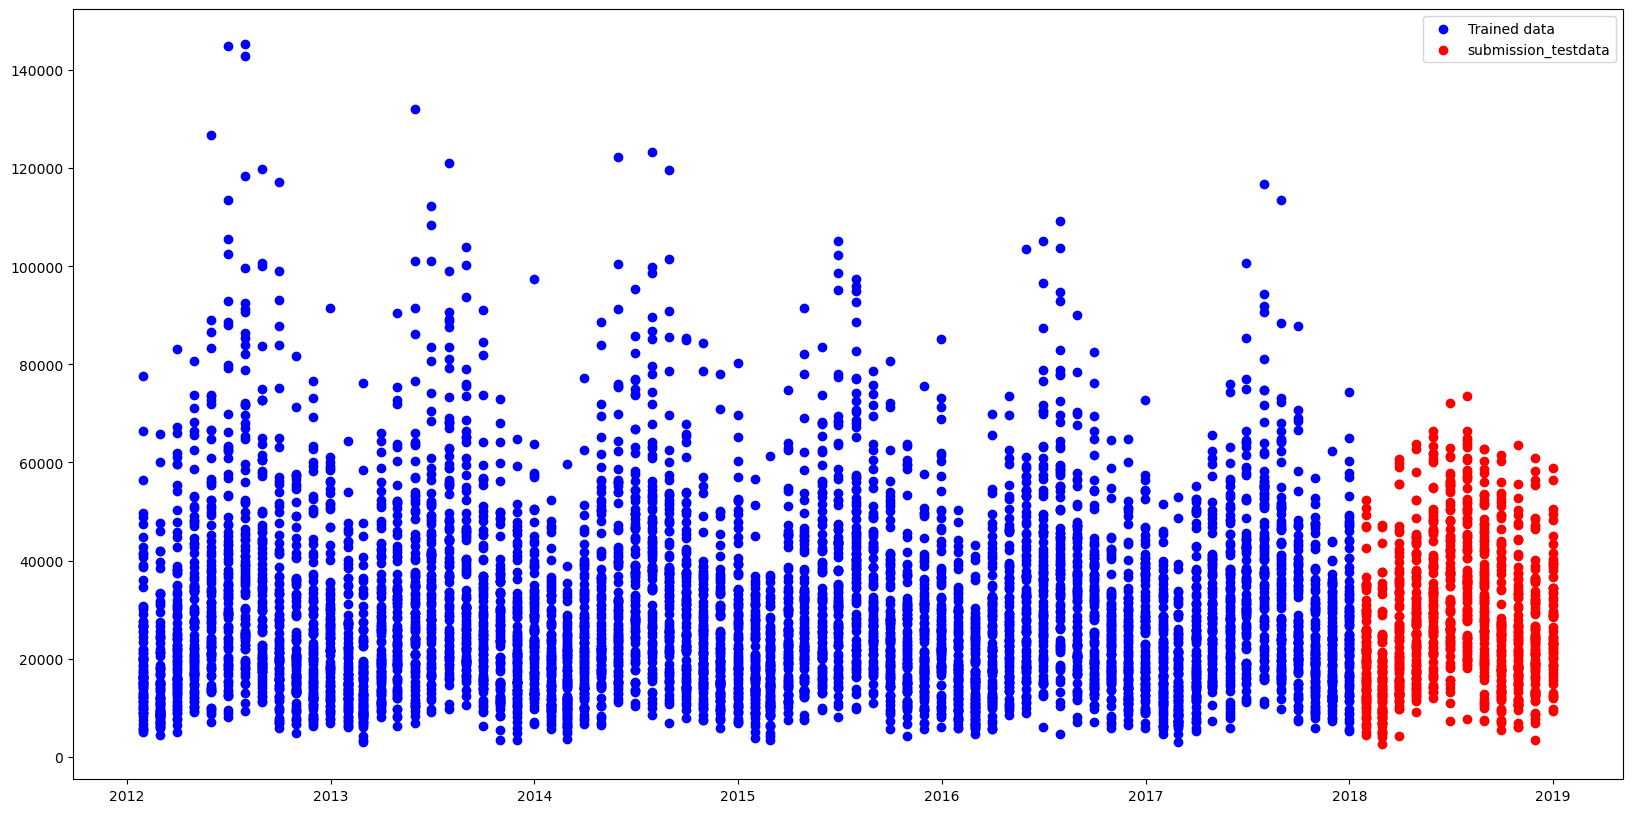

In [954]:
df_train=pd.read_csv(r"C:\Users\ISTM\OneDrive - Ramboll\Desktop\ISHANT\Computer science\quant\Company specific\Maven\Dataset\train.csv")
df_test=pd.read_csv(r"C:\Users\ISTM\OneDrive - Ramboll\Desktop\ISHANT\Computer science\quant\Company specific\Maven\Dataset\test.csv")
df_train.dropna()
df_test.dropna()
df_merged_test=pd.merge(df_test,df,on='id')

merged_df = pd.concat([df_train, df_merged_test], ignore_index=True)
merged_df=merged_df.dropna()
merged_df['date']=pd.to_datetime(merged_df['date'])
given_df=merged_df[merged_df['date']<'2018-01-31']
predicted_df=merged_df[merged_df['date']>='2018-01-31']
plt.figure(figsize=(20,10))
plt.scatter(given_df['date'],given_df['quantity'],label='Trained data',color='b')
plt.scatter(predicted_df['date'],predicted_df['quantity'],label='submission_testdata',color='r')
plt.legend()